
- [x] Import packages
- [x] Import  dataset in to dataframe
- [ ] Create data dictionary
- [ ] Mars
- [ ] Jupiter
- [ ] Saturn
- [ ] Uranus
- [ ] Neptune
- [ ] Comet Haley

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
df =pd.read_csv("../project_2/data/train.csv")

In [77]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [78]:
# Create Data Dictionary

df.shape  # (rows, columns) - 2051, 81


df.isnull().sum()[0]

0

|Feature|Type|Description|
|---|---|---|
|state|object|SAT|
|Id|  |  | 
|PID|  |  | 
|MS SubClass|  |  Identifies the type of dwelling involved in the sale.| 
|MS Zoning|  | Identifies the general zoning classification of the sale | 
|Lot Frontage|  | Linear feet of street connected to property | 
|Lot Area|  |  Lot size in square feet|
|Street|  | Type of road access to property | 
|Alley|  | Type of alley access to property | 
|Lot Shape|  | General shape of property | 
|Land Contour|  | Flatness of the property | 
|Utilities|  |  Type of utilities available|
|Lot Config|  | Lot configuration | 
|Land Slope|  | Slope of property | 
|Neighborhood|  |Physical locations within Ames city limits  | 
|Condition 1|  | Proximity to various conditions |
|Condition 2|  | Proximity to various conditions (if more than one is present) | 
|Bldg Type|  |  Type of dwelling| '
|House Style|  | Style of dwelling | 
|Overall Qual|  | Rates the overall material and finish of the house |
|Overall Cond|  |Rates the overall condition of the house  | 
|Year Built|  | Original construction date | 
|Year Remod/Add|  | Remodel date (same as construction date if no remodeling or additions) | 
|Roof Style|  |  Type of roof|
|Roof Matl|  | Roof material | 
|Exterior 1st|  | Exterior covering on house | 
|Exterior 2nd|  | Exterior covering on house (if more than one material) | 
|Mas Vnr Type|  | Masonry veneer type |
|Mas Vnr Area|  | Masonry veneer area in square feet | 
|Exter Qual|  | Evaluates the quality of the material on the exterior | 
|Exter Cond|  | Evaluates the present condition of the material on the exterior | 
|Foundation|  | Type of foundation | 
|Bsmt Qual|  |  Evaluates the height of the basement|
|Bsmt Cond|  |  Evaluates the general condition of the basement| 
|Bsmt Exposure|  | Refers to walkout or garden level walls | 
|BsmtFin Type 1|  | Rating of basement finished area | 
|BsmtFin SF 1|  | Type 1 finished square feet |
|BsmtFin Type 2|  |Rating of basement finished area (if multiple types)  | 
|BsmtFin SF 2|  | Type 2 finished square feet | 
|Bsmt Unf SF|  | Unfinished square feet of basement area | 
|Total Bsmt SF|  |Total square feet of basement area  |
|Heating|  | Type of heating | 
|Heating QC|  | Heating quality and condition | 
|Central Air|  | Central air conditioning | 
|Electrical|  | Electrical system | 
|1st Flr SF|  |  First Floor square feet|
|2nd Flr SF|  | Second floor square feet | 
|Low Qual Fin SF|  | Low quality finished square feet (all floors) | 
|Gr Liv Area|  | Above grade (ground) living area square feet | 
|Bsmt Full Bath|  | Basement full bathrooms |
|Bsmt Half Bath|  | Basement half bathrooms | 
|Full Bath|  |  Full bathrooms above grade| 
|Half Bath|  |  Half baths above grade| 
|Bedroom AbvGr|  | Bedrooms above grade (does NOT include basement bedrooms) |
|Kitchen AbvGr|  | Kitchens above grade | 
|Kitchen Qual|  | Kitchen quality | 
|TotRms AbvGrd|  | Total rooms above grade (does not include bathrooms) | 
|Functional|  |  Home functionality (Assume typical unless deductions are warranted)|
|Fireplaces|  |  Number of fireplaces| 
|Fireplace Qu|  | Fireplace quality | 
|Garage Type|  | Garage location | 
|Garage Yr Blt|  | Year garage was built |
|Garage Finish|  | Interior finish of the garage | 
|Garage Cars|  | Size of garage in car capacity | 
|Garage Area|  | Size of garage in square feet | 
|Garage Qual|  | Garage quality |
|Garage Cond|  | Garage condition | 
|Paved Drive|  | Paved driveway | 
|Wood Deck SF|  | Wood deck area in square feet | 
|Open Porch SF|  | Open porch area in square feet |
|Enclosed Porch|  | Enclosed porch area in square feet | 
|3Ssn Porch|  | Three season porch area in square feet | 
|Screen Porch|  | Screen porch area in square feet | 
|Pool Area|  |  Pool area in square feet| 
|**Pool QC** | string | Pool quality |
|Fence|  | Fence quality | 
|Misc Feature|  | Miscellaneous feature not covered in other categories  | 
|Misc Val|  |  $Value of miscellaneous feature| 
|Mo Sold|  |  Month Sold (MM)| 
|Yr Sold|  |  Year Sold (YYYY)| 
|Sale Type|  | Type of sale |
|SalePrice|  |  Condition of sale|

## Data Cleaning and EDA

Are missing values imputed appropriately?
Are distributions examined and described?
Are outliers identified and addressed?
Are appropriate summary statistics provided?
Are steps taken during data cleaning and EDA framed appropriately?
Does the student address whether or not they are likely to be able to answer their problem statement with the provided data given what they've discovered during EDA?

In [99]:
# Clean data

#  Identify missing data  
column_null_counts = df.isnull().sum() *100/ len(df)
missing_data_columns =column_null_counts[column_null_counts >0]
missing_data_columns.sort_values(ascending=False)

Lot Frontage      16.089712
Garage Finish      5.558264
Garage Qual        5.558264
Garage Yr Blt      5.558264
Garage Cond        5.558264
Garage Type        5.509508
Bsmt Exposure      2.827889
BsmtFin Type 2     2.730375
BsmtFin Type 1     2.681619
Bsmt Cond          2.681619
Bsmt Qual          2.681619
Mas Vnr Area       1.072647
Mas Vnr Type       1.072647
Bsmt Half Bath     0.097513
Bsmt Full Bath     0.097513
Garage Cars        0.048757
Total Bsmt SF      0.048757
Garage Area        0.048757
BsmtFin SF 2       0.048757
BsmtFin SF 1       0.048757
Bsmt Unf SF        0.048757
dtype: float64

|Feature|percent missing |description|options|
|---|---|---|---|
| Pool QC|99.56| Pool quality | Ex -Excellent, Gd- Good,TA-Average/Typical,Fa-Fair,NA-No Pool|
|Misc Feature|96.83| Miscellaneous feature not covered in other categories|Elev-Elevator, Gar2-2nd Garage (if not described in garage section, Othr-Other, Shed-Shed (over 100 SF)TenC-Tennis Court,NA-None|
|Alley|93.17|Type of alley access to property|Grvl-Gravel,Pave-Paved, NA-No alley access|
|Fence| 80.49|Fence quality| GdPrv- Good Privacy,MnPrv-Minimum Privacy,GdWo	Good Wood,MnWw-Minimum Wood/Wire,NA	No Fence|
|Fireplace Qu|48.75|Fireplace quality|Ex-Excellent Exceptional Masonry Fireplace,Gd-Good - Masonry Fireplace in main level,TA-Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement ,Fa-Fair - Prefabricated Fireplace in basement, Po	Poor - Ben Franklin Stove,NA-No Fireplace

In [100]:
# Pool QC       99.561190  PoolQC: Pool quality  #{ Ex- Excellent,Gd- Good,TA- Average/Typical,Fa- Fair,NA- No Pool
missing_pool_quality = df['Pool QC'].isnull()
pool_missing_quality_with_area_not_zero = (missing_pool_quality) & (df['Pool Area'] >0)

missing_misc_feature = df['Misc Feature'].isnull()
missing_alley =df['Alley'].isnull()
missing_fence =df['Fence'].isnull()
missing_fireplace_quality =df['Fireplace Qu'].isnull()
df.loc[ (missing_pool_quality & (df['Pool Area'] ==0)),'Pool QC'] ='NA'

df.loc[missing_misc_feature, 'Misc Feature'] ='NA'
df.loc[missing_alley,'Alley'] ='NA'
df.loc[missing_fence, 'Fence'] ='NA'
df.loc[missing_fireplace_quality,'Fireplace Qu'] ='NA'


print ("Pool Quality has over 99% missing values, opon investigation it is revealed that these houses have no pools,\
       ' therefore the pool quality can be set to 'NA' - no pool")
print (f"After imputing pool quality - missing count for 'PoolWC ={df['Pool QC'].isnull().sum()}")
print (f"For misc feature, alley, fence, fireplace quality - in the absence of the information and given that there is 'NA'\
         option - it may have been left empty to represent NA  or  we are just going to be conservative and assume NA \
         as this information is not provided")

Pool Quality has over 99% missing values, opon investigation it is revealed that these houses have no pools,       ' therefore the pool quality can be set to 'NA' - no pool
After imputing pool quality - missing count for 'PoolWC =0
For misc feature, alley, fence, fireplace quality - in the absence of the information and given that there is 'NA'         option - it may have been left empty to represent NA  or  we are just going to be conservative and assume NA          as this information is not provided


https://www.gimme-shelter.com/frontage-50043/
width at the front is also known as frontage

In [106]:
df['Lot Area'].value_counts()

9600     34
7200     27
6000     26
10800    19
7500     18
         ..
12887     1
12891     1
10846     1
14948     1
12292     1
Name: Lot Area, Length: 1476, dtype: int64

In [123]:
df['Lot Area'].value_counts()
df[df['Lot Frontage'] ==60]['Lot Area'].describe()

count      179.000000
mean      8891.804469
std       2414.380929
min       3600.000000
25%       7200.000000
50%       8520.000000
75%      10320.000000
max      21930.000000
Name: Lot Area, dtype: float64

In [116]:
missing_lot_frontage =df['Lot Frontage'].isnull()
df['Lot Area'].value_counts()
#plt.scatter(df['Lot Area'],df['Lot Frontage'])

# 11000    4
# 4435     3
# 7750     3
# 7500     3
# 3196     2
df[(df['Lot Area'] > 10500) & (df['Lot Area'] < 11500) ]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,4,2009,WD,220000
25,624,535104120,20,RL,92.0,10573,Pave,NA,IR1,Lvl,...,288,0,NA,GdPrv,NA,0,4,2009,WD,187500
31,2860,909276010,70,RL,NaN,11435,Pave,NA,IR1,HLS,...,0,0,NA,NA,NA,0,6,2006,WD,230000
33,1933,535302070,20,RL,60.0,10950,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,4,2007,WD,125000
34,820,906340110,20,RL,79.0,10637,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,9,2009,WD,297000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,1004,527161010,60,RL,100.0,10839,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,7,2008,WD,181000
2020,2440,528290140,60,RL,58.0,10852,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,2,2006,WD,173000
2025,2394,528142060,60,RL,82.0,10672,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,11,2006,New,298236
2036,525,528477070,60,FV,84.0,10603,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,7,2009,WD,270000


In [ ]:
# 2017 Data Import & Cleaning
# 2018 Data Import and Cleaning
# Exploratory Data Analysis
# Data Visualization
# Descriptive and Inferential Statistics
# Outside Research
# Conclusions and Recommendations

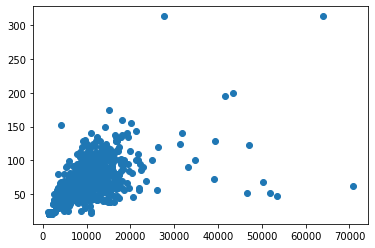

In [124]:
#user EDA / descriptive  statistics to understand data
plt.scatter(df['Lot Area'],df['Lot Frontage'])

In [125]:
df[(df['Lot Area'] > 10500) & (df['Lot Area'] < 11500) ]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,4,2009,WD,220000
25,624,535104120,20,RL,92.0,10573,Pave,NA,IR1,Lvl,...,288,0,NA,GdPrv,NA,0,4,2009,WD,187500
31,2860,909276010,70,RL,NaN,11435,Pave,NA,IR1,HLS,...,0,0,NA,NA,NA,0,6,2006,WD,230000
33,1933,535302070,20,RL,60.0,10950,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,4,2007,WD,125000
34,820,906340110,20,RL,79.0,10637,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,9,2009,WD,297000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,1004,527161010,60,RL,100.0,10839,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,7,2008,WD,181000
2020,2440,528290140,60,RL,58.0,10852,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,2,2006,WD,173000
2025,2394,528142060,60,RL,82.0,10672,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,11,2006,New,298236
2036,525,528477070,60,FV,84.0,10603,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,7,2009,WD,270000
